# MULTI LEVEL PERCEPTRON

## -> Used for solving complex problems 
## -> More importantly used to solve non linear problems .
## -> Almost all real world problems are complex and can be solved using MLP.

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x)*(1 - sigmoid(x))

In [4]:
def train_mlp(X, y, lr=0.1, epochs=20000):
    np.random.seed(42)

    W1 = np.random.randn(2, 3)
    b1 = np.zeros((1, 3))
    W2 = np.random.randn(3, 1)
    b2 = np.zeros((1, 1))

    weights = []
    bias = []

    for epoch in range(epochs):
        z1 = np.dot(X, W1) + b1
        a1 = sigmoid(z1)
        z2 = np.dot(a1, W2) + b2
        a2 = sigmoid(z2)

        error = y - a2

        d_a2 = error * sigmoid_derivative(z2)
        d_a1 = np.dot(d_a2, W2.T) * sigmoid_derivative(z1)

        W2 += lr * np.dot(a1.T, d_a2)
        b2 += lr * np.sum(d_a2, axis=0, keepdims=True)
        W1 += lr * np.dot(X.T, d_a1)
        b1 += lr * np.sum(d_a1, axis=0, keepdims=True)

        weights.append((W1.copy(), W2.copy()))
        bias.append((b1.copy(), b2.copy()))

    return W1, b1, W2, b2, weights, bias

W1, b1, W2, b2, weights, bias = train_mlp(X, y, lr=0.5, epochs=5000)


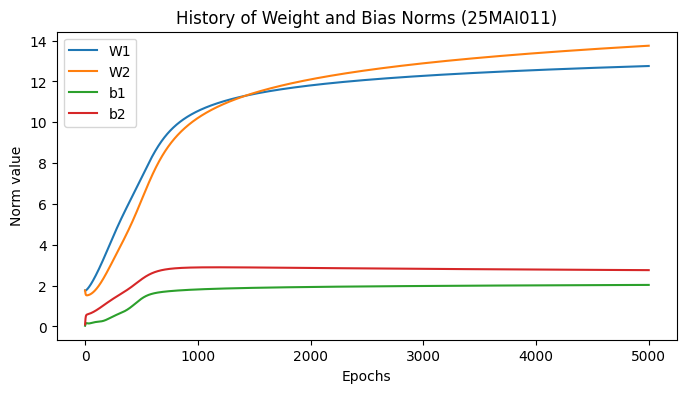

In [5]:
def plot_weight_bias_history(weights, bias_history):
    w1_norms = [np.linalg.norm(w1) for w1, _ in weights]
    w2_norms = [np.linalg.norm(w2) for _, w2 in weights]
    b1_norms = [np.linalg.norm(b1) for b1, _ in bias]
    b2_norms = [np.linalg.norm(b2) for _, b2 in bias]

    plt.figure(figsize=(8, 4))
    plt.plot(w1_norms, label="W1")
    plt.plot(w2_norms, label="W2")
    plt.plot(b1_norms, label="b1")
    plt.plot(b2_norms, label="b2")
    plt.xlabel("Epochs")
    plt.ylabel("Norm value")
    plt.title("History of Weight and Bias Norms (25MAI011)")
    plt.legend()
    plt.show()

plot_weight_bias_history(weights, bias)

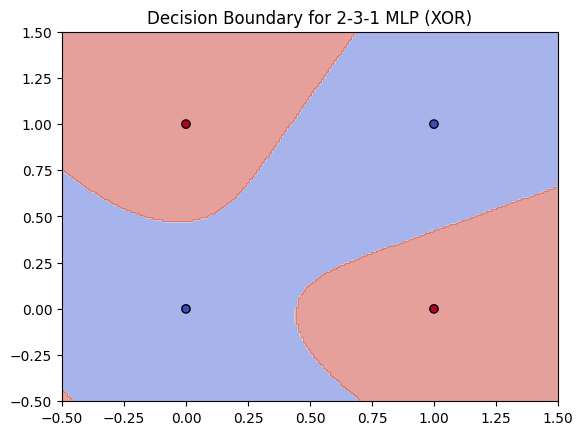

In [6]:

def plot_decision_boundary(W1, b1, W2, b2):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    grid = np.c_[xx.ravel(), yy.ravel()]

    a1 = sigmoid(np.dot(grid, W1) + b1)
    a2 = sigmoid(np.dot(a1, W2) + b2)

    Z = (a2 >= 0.5).astype(int).reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title("Decision Boundary for 2-3-1 MLP (XOR)")
    plt.show()

plot_decision_boundary(W1, b1, W2, b2)

